# Tools



In [15]:
import gradio as gr
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
import joblib
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("darkgrid")

# Dataset

In [16]:
df=pd.read_csv('heart.csv')
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


# Data Pre-Processing

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [18]:
df[df.duplicated()]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [19]:
df.drop_duplicates(keep='first',inplace=True)
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


# Selection of inputs(x) and target(y)

In [20]:
x=df.iloc[:,1:-1].values
y=df.iloc[:,-1].values

# Splitting of data into train and test

In [21]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=42,test_size=0.3)

In [22]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

# Model

In [23]:
def cauchy_pdf(x, loc, scale):
  """Calculates the Cauchy probability density function"""
  return (1 / (np.pi * scale * (1 + ((x - loc) / scale)**2)))

class CauchyNB:
  def __init__(self):
    self.classes_ = None
    self.loc_ = None
    self.scale_ = None
    self.prior_ = None

  def fit(self, X, y):
    """Fits the Cauchy Naive Bayes model to the data"""
    self.classes_ = np.unique(y)
    self.prior_ = np.mean(y == self.classes_[:, np.newaxis], axis=0)
    self.loc_, self.scale_ = [], []
    for c in self.classes_:
      X_c = X[y == c]
      self.loc_.append(np.mean(X_c, axis=0))
      self.scale_.append(np.std(X_c, axis=0))
    self.loc_ = np.array(self.loc_)
    self.scale_ = np.array(self.scale_)

  def predict(self, X):
    """Predicts the class labels for new data points"""
    posteriors = []
    for i in range(X.shape[0]):
      class_likelihoods = []
      for c in range(len(self.classes_)):
        likelihood = 1.0
        for j in range(X.shape[1]):
          likelihood *= cauchy_pdf(X[i, j], self.loc_[c, j], self.scale_[c, j])
        class_likelihoods.append(likelihood * self.prior_[c])
      posteriors.append(np.argmax(class_likelihoods))
    return np.array(posteriors)

  def evaluate(self, X, y):
    """Evaluates the model performance"""
    predicted_y = self.predict(X)
    # Confusion matrix
    confusion_matrix = np.zeros((len(self.classes_), len(self.classes_)))
    for i in range(len(y)):
      confusion_matrix[y[i], predicted_y[i]] += 1

    # Accuracy
    accuracy = np.sum(predicted_y == y) / len(y)

    # Precision, recall
    precision = np.zeros(len(self.classes_))
    recall = np.zeros(len(self.classes_))
    for c in range(len(self.classes_)):
      tp = confusion_matrix[c, c]  # True positives
      fp = np.sum(confusion_matrix[:, c]) - tp  # False positives
      fn = np.sum(confusion_matrix[c, :]) - tp  # False negatives
      if tp > 0:
        precision[c] = tp / (tp + fp)
        recall[c] = tp / (tp + fn)

    # F1 score (harmonic mean of precision and recall)
    f1_score = np.zeros(len(self.classes_))
    for c in range(len(self.classes_)):
      if precision[c] + recall[c] > 0:
        f1_score[c] = 2 * (precision[c] * recall[c]) / (precision[c] + recall[c])

    # Macro F1 score (average across classes)
    macro_f1 = np.mean(f1_score)

    return accuracy, macro_f1, precision, recall, confusion_matrix


In [24]:
model = CauchyNB()
model.fit(x_train,y_train)

# Predict the target

In [25]:
y_pred = model.predict(x_test)


In [26]:
y_test[:20]

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0],
      dtype=int64)

In [27]:
y_pred[:20]

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0],
      dtype=int64)

# Result

Precision: 0.8461538461538461
Recall: 0.8979591836734694
Accuracy: 0.8571428571428571
F1 Score: 0.8712871287128713


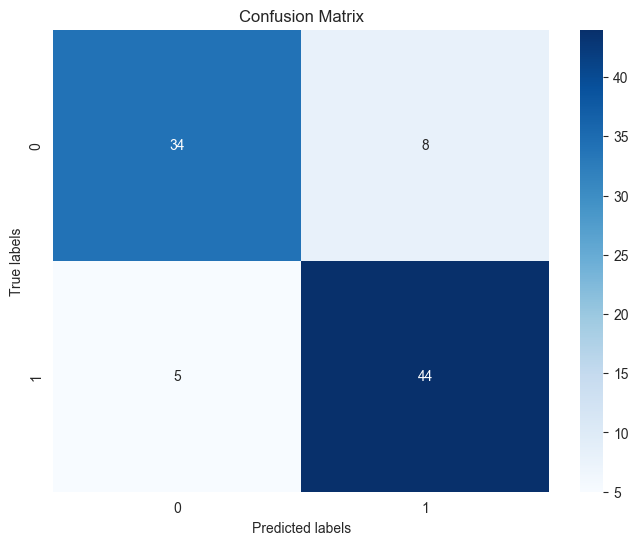

In [28]:

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score 

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Precision Score
precision = precision_score(y_test, y_pred)

# Recall Score
recall = recall_score(y_test, y_pred)

# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)

# F1 Score
f1 = f1_score(y_test, y_pred)

# Printing Precision, Recall, Accuracy, and F1 Score
print("Precision:", precision)#
print("Recall:", recall)
print("Accuracy:", accuracy)
print("F1 Score:", f1)

# Plotting Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()
